In [24]:
import torch, torchvision
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [25]:
class Generator(torch.nn.Module):

    def __init__(self, z_dim, channels_img, features_g):
        super(Generator,self).__init__()

        self.gen = torch.nn.Sequential(

            self._block(z_dim, features_g*16, 4, 1, 0), # 4x4
            self._block(features_g*16, features_g*8, 4, 2, 1), # 8x8
            self._block(features_g*8, features_g*4, 4, 2, 1), # 16x16
            self._block(features_g*4, features_g*2, 4, 2, 1), # 32x32

            torch.nn.ConvTranspose2d(features_g*2, channels_img, kernel_size=4, stride=2, padding=1), # 64x64
            torch.nn.Tanh()

        )

    def _block(self, in_channels, out_channels, kernel_size, stride, padding):

        return torch.nn.Sequential(
            torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias=False),
            torch.nn.BatchNorm2d(out_channels),
            torch.nn.ReLU()
        )

    def forward(self,x):
        return self.gen(x)

In [26]:
# input shape : (batch_size, 100, 1, 1)
gen = Generator(100, 3, 64)
gen.load_state_dict(torch.load('/Users/gursi/Desktop/ML/myML/GANs/WGAN_GP/models/gen223.pt', map_location='cpu'))
gen.eval()
print('model loaded')

model loaded


In [27]:
noise1 = torch.randn((1,100,1,1))
noise2 = torch.randn((1,100,1,1))

In [28]:
def post_process(img):
    t = torchvision.transforms.ToPILImage()
    return t(img.clamp(0,1))

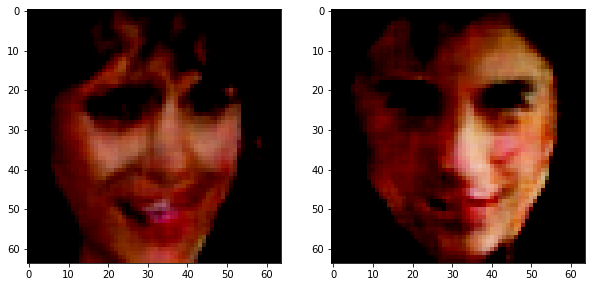

In [21]:
output1 = gen.forward(noise1)[0] 
output2 = gen.forward(noise2)[0]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax = ax.flatten()

ax[0].imshow(post_process(output1))
ax[1].imshow(post_process(output2))
plt.show()

In [22]:
diff = noise2 - noise1
intervals = 5
x = diff/intervals
latent = torch.zeros((intervals, 100, 1, 1))

for i in range(intervals): 
    img = noise1 + (x * (i+1))
    latent[i] = img    

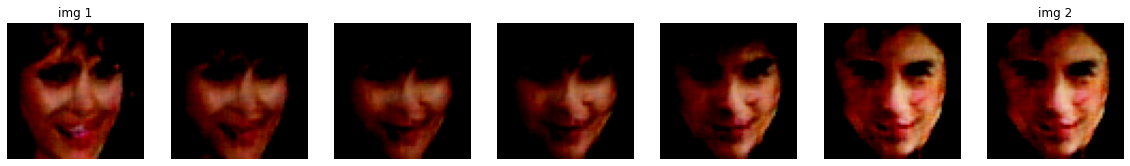

In [23]:
interpolated = gen.forward(latent)
fig2, ax2 = plt.subplots(nrows=1, ncols=7, figsize=(20,10))
ax2.flatten()

ax2[0].imshow(post_process(output1))
ax2[0].set_title('img 1')
ax2[0].axis(False)
ax2[6].imshow(post_process(output2))
ax2[6].set_title('img 2')
ax2[6].axis(False)

for img, axis in zip(interpolated, ax2[1:6]):
    axis.imshow(post_process(img))
    axis.axis(False)